In [31]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
file_list = glob("data/a100/*/*output_ncu.csv")
profile_results = []
memory_pct = []
compute_pct = []
for file in file_list:
    df = pd.read_csv(file)
    used_columns = [0,6,13,14,15,16]
    unused_columns = df.columns[list(set(range(df.columns.shape[0])).difference(used_columns))]
    df = df.drop(columns=unused_columns)
    metrics = ['Duration', 'Memory Throughput', 'Compute (SM) Throughput']
    df = df[df['Metric Name'].isin(metrics) & df['Section Name'].isin(["GPU Speed Of Light Throughput"])]
    df_memory = df[0::3][['ID', 'Kernel Name', 'Metric Value']].rename(columns={'Metric Value': 'memory'})
    df_duration = df[1::3][['ID', 'Kernel Name', 'Metric Value']].rename(columns={'Metric Value': 'duration'})
    df_compute = df[2::3][['ID', 'Kernel Name', 'Metric Value']].rename(columns={'Metric Value': 'compute'})
    df = pd.merge(df_memory, df_duration, on=['ID', 'Kernel Name'])
    df = pd.merge(df, df_compute, on=['ID', 'Kernel Name'])
    df['memory'] = df['memory'].str.replace(',', '').astype(float)/100
    df['duration'] = df['duration'].str.replace(',', '').astype(float)/1e9
    df['compute'] = df['compute'].str.replace(',', '').astype(float)/100
    profile_results.append(df.groupby('Kernel Name'))
    time_fraction = df['duration']/np.sum(df['duration'])
    memory_pct.append(np.dot(time_fraction, df['memory']))
    compute_pct.append(np.dot(time_fraction, df['compute']))

In [29]:
memory_pct

[0.171995496339209,
 0.42827413347420784,
 0.20844794454463927,
 0.4290792815486802]

In [30]:
compute_pct

[0.1754384847841299,
 0.5048970372819132,
 0.16334168914998157,
 0.529458587400587]

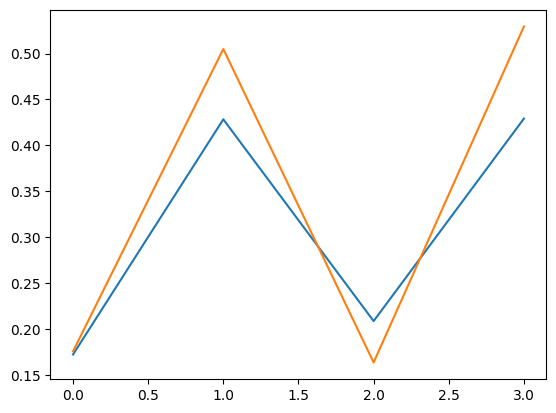

In [34]:
plt.plot(memory_pct)
plt.plot(compute_pct)